# Resume Parsing

## 1. Load data

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df_resume = pd.read_csv('data/resume.csv')

In [3]:
df_resume.head(3)

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [4]:
df_resume.Category.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [5]:
df_resume.shape

(2484, 4)

In [6]:
# shuffles the rows of the DataFrame df_resume into a random order
df_resume = df_resume.reindex(np.random.permutation(df_resume.index))

df_resume = df_resume.copy().iloc[:1000,]
df_resume.shape

(1000, 4)

## 2.Load skill data

In [7]:
import spacy

In [8]:
nlp = spacy.load('en_core_web_md')
skill_path = 'data/skills.jsonl'

ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [9]:
doc = nlp("Kyi likes python")
doc.ents

(Kyi, python)

## 3. try to Extract skills (from resume.csv)

In [10]:
df_resume.head()

,ID,Resume_str,Resume_html,Category
2274,11187796,MICHAEL'S ARTS AND CRAFTS STORE ...,"<div class=""fontsize fontface vmargins hmargin...",ARTS
871,10333051,RN/RN TEAM LEAD Executive P...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS
1616,14698557,GENERAL MANAGER Summary com...,"<div class=""fontsize fontface vmargins hmargin...",APPAREL
1258,23085604,"CHIEF SYSTEM ARCHITECT, SVP SYSTEM IN...","<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA
1012,30608780,SALES Career Focus Professio...,"<div class=""fontsize fontface vmargins hmargin...",SALES


In [20]:
# clean our data

from spacy.lang.en.stop_words import STOP_WORDS

def preprocessing(sentence):
    stopwords    = list(STOP_WORDS)
    doc          = nlp(sentence)
    clean_tokens = []
    
    for token in doc:
        if token.text not in stopwords and token.pos_ != 'PUNCT' and token.pos_ != 'SYM' and token.pos_ != 'SPACE':
            clean_tokens.append(token.lemma_.lower().strip())
            # get lowercase, no extra space
    return " ".join(clean_tokens)

In [23]:
random_resume = df_resume.Resume_str.iloc[5]
random_resume[:300]

preprocessing(random_resume[:300])

'business development representative summary dedicated business development representative detail orient self starter congenial salesperson excel closing percentage background inside sale customer service skill fca kain automot'

In [ ]:
# data preprocessing for each row of Resume_str column
for i, row in df_resume.iterrows():
    print(f"row; {row}")
    clean_text = preprocessing(row.Resume_str)
    print(f"clean_text: {clean_text}")
    df_resume.at[i, 'Clean_resume'] = clean_text
    print("====")

In [25]:
df_resume.head()

,ID,Resume_str,Resume_html,Category,Clean_resume
2274,11187796,MICHAEL'S ARTS AND CRAFTS STORE ...,"<div class=""fontsize fontface vmargins hmargin...",ARTS,michael 's arts and crafts store summary i det...
871,10333051,RN/RN TEAM LEAD Executive P...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS,rn rn team lead executive profile i self motiv...
1616,14698557,GENERAL MANAGER Summary com...,"<div class=""fontsize fontface vmargins hmargin...",APPAREL,general manager summary company offer growth o...
1258,23085604,"CHIEF SYSTEM ARCHITECT, SVP SYSTEM IN...","<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,chief system architect svp system integration ...
1012,30608780,SALES Career Focus Professio...,"<div class=""fontsize fontface vmargins hmargin...",SALES,sale career focus professional lay notch sale ...


## 4. Really extract skills

In [33]:
def get_skills(text):
    doc = nlp(text)
    
    skills = []
    
    for ent in doc.ents:
        if ent.label_ == 'SKILL':
            skills.append(ent.text)
    
    return skills

In [34]:
def unique_skills(x):
    return list(set(x))

In [35]:
df_resume['Skills'] = df_resume.Clean_resume.apply(get_skills)
df_resume['Skills'] = df_resume.Skills.apply(unique_skills)

In [36]:
df_resume.Skills

2274    [skills, customer service, assessment, cash, p...
871     [integration, screening, assessment, revenue, ...
1616    [reconcile, skills, customer service, supply, ...
1258    [integration, assessment, vast, studio, commun...
1012    [customer service, supply, staff training, pla...
                              ...                        
1232    [skills, fuel, outsourcing, commerce, restruct...
1542    [financial planning, integration, skills, fore...
1346    [skills, customer service, revenue, policies, ...
2351    [analyze, customer service, record, public, fa...
781     [skills, administration, decision support, ana...
Name: Skills, Length: 1000, dtype: object

## 5. Visualization

In [ ]:
set(df_resume.Category)

In [38]:
category = 'INFORMATION-TECHNOLOGY'
cond = df_resume.Category == category

df_resume_it = df_resume[cond]
df_resume_it.shape

(50, 6)

In [39]:
all_skills = np.concatenate(df_resume_it.Skills.values)

In [40]:
from collections import Counter, OrderedDict

counting = Counter(all_skills)
counting = OrderedDict(counting.most_common(10))

In [41]:
counting

OrderedDict([('information technology', 46),
             ('system', 44),
             ('software', 41),
             ('it', 39),
             ('management', 38),
             ('project', 37),
             ('technology', 36),
             ('process', 35),
             ('design', 35),
             ('technical', 33)])

<BarContainer object of 10 artists>

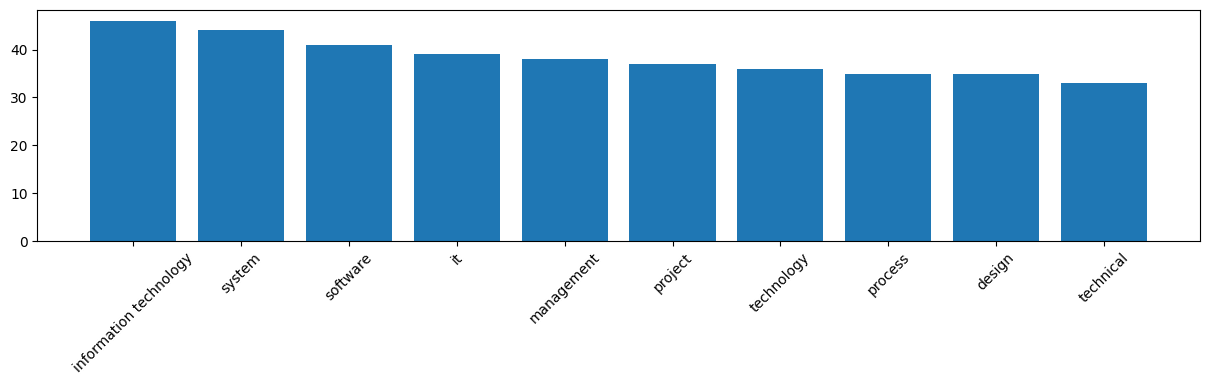

In [42]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,3))
plt.xticks(rotation = 45)

plt.bar(counting.keys(),counting.values())

## 6. Name Entity Recognition

In [43]:
from spacy import displacy

text = df_resume_it.Clean_resume.iloc[32]

doc  = nlp(text)

colors  = {"SKILL": "linear-gradien(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}
displacy.render(doc, style = 'ent', options=options)

## 7. Load the PDF - add some realism

In [ ]:
!pip3 install PyPDF2

In [47]:
from PyPDF2 import PdfReader

In [49]:
reader = PdfReader("data/resumeDataset/data/data/BANKING/3547447.pdf")
page   = reader.pages[0]
text   = page.extract_text()

In [50]:
text = preprocessing(text)

In [51]:
doc = nlp(text)

In [52]:
colors  = {"SKILL": "linear-gradien(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}
displacy.render(doc, style = 'ent', options=options)